# 

# Working with Data Files in R

In this chapter, we work with data in R. To start, we need to load our
data into R; this requires identifying the type of data file we have
(e.g., .csv, .xlsx, .dta, .txt) and finding the appropriate function to
load in the data. This creates a data frame object containing the
information from the file. After demonstrating how to load in such data,
this chapter shows you how to find information about data columns,
including finding missing values, summarizing columns, and subsetting
the data. Additionally, we look at how to create new columns through
some simple transformations.

In this chapter and all future chapters, we load in the required
libraries at the start of the chapter; for example, in this particular
chapter, we need a single package **HDSinRdata** that contains the
sample datasets used in this book.

In [ ]:
library(HDSinRdata)

## Importing and Exporting Data  

The data we use in this chapter contains information about patients who
visited one of the University of Pittsburgh’s seven pain management
clinics. This includes patient-reported pain assessments using the
Collaborative Health Outcomes Information Registry (CHOIR) at baseline
and at a 3-month follow-up \[@alter2021hierarchical\]. You can use the
help operator `?pain` to learn more about the source of this data and to
read its column descriptions. Since this data is available in our R
package, we can use the `data()` function to load this data into our
environment. Note that this data has 21,659 rows and 92 columns.

In [ ]:
data(pain)
dim(pain)

[1] 21659    92

In general, the data you will be using is not available in R packages
and will instead exist in one or more data files on your personal
computer. In order to load in this data to R, you need to use the
function that corresponds to the file type you have. For example, you
can load a .csv file using the `read.csv()` function in base R or using
the `read_csv()` function from the **readr** package, both of which were
shown in **?@sec-intro-to-r**. As an example, we load the
`fake_names.csv` dataset using both of these functions. Looking at the
print output, we can see that there is a slight difference in the data
structure and data types storing the data between these two functions.
The function `read.csv()` loads the data as a data frame, whereas the
function `read_csv()` loads the data as a `spec_tbl_df`, a special type
of data frame called a **tibble** that is used by the **tidyverse**
packages. We cover this data structure in more detail in
**?@sec-transformations-summaries**. For now, note that you can use
either function to read in a .csv file.

In [ ]:
read.csv("data/fake_names.csv")

                 Name Age     DOB            City State
1           Ken Irwin  37 6/28/85      Providence    RI
2 Delores Whittington  56 4/28/67      Smithfield    RI
3       Daniel Hughes  41 5/22/82      Providence    RI
4         Carlos Fain  83  2/2/40          Warren    RI
5        James Alford  67 2/23/56 East Providence    RI
6        Ruth Alvarez  34 9/22/88      Providence    RI

In [ ]:
readr::read_csv("data/fake_names.csv", show_col_types=FALSE)

# A tibble: 6 × 5
  Name                  Age DOB     City            State
  <chr>               <dbl> <chr>   <chr>           <chr>
1 Ken Irwin              37 6/28/85 Providence      RI   
2 Delores Whittington    56 4/28/67 Smithfield      RI   
3 Daniel Hughes          41 5/22/82 Providence      RI   
4 Carlos Fain            83 2/2/40  Warren          RI   
5 James Alford           67 2/23/56 East Providence RI   
6 Ruth Alvarez           34 9/22/88 Providence      RI   

In addition to loading data into R, you may also want to save data from
R into a data file you can access later or share with others. To write a
data frame from R to a .csv file, you can use the `write.csv()`
function. This function has three key arguments: the first argument is
the data frame in R that you want to write to a file, the second
argument is the file name or the full file path where you want to write
the data, and the third argument is whether or not you want to include
the row names as an extra column. In this case, we do not include row
names. If you do not specify a file path, R saves the file in our
current working directory.

In [ ]:
df <- data.frame(x = c( 1, 0, 1), y = c("A", "B", "C"))
write.csv(df, "data/test.csv", row.names=FALSE)

If your data is not in a .csv file, you may need to use another package
to read in the file. The two most common packages are the **readxl**
package \[@R-readxl\], which makes it easy to read in Excel files, and
the **haven** package \[@R-haven\], which can import SAS, SPSS, and
Stata files. For each function, you need to specify the file path to the
data file.

-   **Tab-Delimited Files**: You can read in a tab-separated .txt file
    using the `read.delim()` function in base R.

-   **Excel Files**: You can read in a .xls or .xlsx file using
    `readxl::read_excel()`, which allows you to specify a sheet and/or
    cell range within a file (e.g.,
    `read_excel('test.xlsx', sheet="Sheet1")`).

-   **SAS**: `haven::read_sas()` reads in .sas7bdat or .sas7bcat files,
    `haven::read_xpt()` reads in SAS transport files.

-   **Stata**: `haven::read_dta()` reads in .dta files.

-   **SPSS**: `haven::read_spss()` reads in .spss files.

## Summarizing and Creating Data Columns

We now look at the data we have loaded into the data frame called
`pain`. We use the `head()` function to print the first six rows.
However, note that we have so many columns that not all of the columns
are displayed! For those that are displayed, we can see the data type
for each column under the column name. For example, we can see that the
column `PATIENT_NUM` is a numeric column of type `dbl`. Because patients
identification numbers are technically nominal in nature, we might
consider whether we should make convert this column to a factor or a
character representation later on. We can use the `names()` function to
print all the column names. Note that columns `X101` to `X238`
correspond to numbers on a body pain map (see the data documentation for
the image of this map). Each of these columns has a 1 if the patient
indicated that they have pain in that corresponding body part and a 0
otherwise.

In [ ]:
head(pain)

# A tibble: 6 × 92
  PATIENT_NUM  X101  X102  X103  X104  X105  X106  X107  X108  X109  X110  X111
        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1       13118     0     0     0     0     0     0     0     0     0     0     0
2       21384     0     0     0     0     0     0     0     0     0     0     0
3        6240     0     0     0     0     0     0     0     0     0     0     0
4        1827     0     0     0     0     0     0     0     0     0     0     0
5       11309     0     0     0     0     0     0     0     0     0     0     0
6       11093     0     0     0     0     0     0     0     0     0     1     0
# ℹ 80 more variables: X112 <dbl>, X113 <dbl>, X114 <dbl>, X115 <dbl>,
#   X116 <dbl>, X117 <dbl>, X118 <dbl>, X119 <dbl>, X120 <dbl>, X121 <dbl>,
#   X122 <dbl>, X123 <dbl>, X124 <dbl>, X125 <dbl>, X126 <dbl>, X127 <dbl>,
#   X128 <dbl>, X129 <dbl>, X130 <dbl>, X131 <dbl>, X132 <dbl>, X133 <dbl>,
#   X134 <dbl>, X135 <dbl>, X136 <dbl>, X2

 [1] "PATIENT_NUM"                      "X101"                            
 [3] "X102"                             "X103"                            
 [5] "X104"                             "X105"                            
 [7] "X106"                             "X107"                            
 [9] "X108"                             "X109"                            
[11] "X110"                             "X111"                            
[13] "X112"                             "X113"                            
[15] "X114"                             "X115"                            
[17] "X116"                             "X117"                            
[19] "X118"                             "X119"                            
[21] "X120"                             "X121"                            
[23] "X122"                             "X123"                            
[25] "X124"                             "X125"                            
[27] "X126"              

Recall that the `$` operator can be used to access a single column.
Alternatively, we can use double brackets `[[]]` to select a column. We
demonstrate both ways to print the first five values in the column with
the patient’s average pain intensity.

In [ ]:
pain$PAIN_INTENSITY_AVERAGE[1:5]

[1] 7 5 4 7 8

[1] 7 5 4 7 8

### Column Summaries 

To explore the range and distribution of a column’s values, we can use
some of the base R functions. For example, the `summary()` function is a
useful way to summarize a numeric column’s values. We can see that the
pain intensity values range from 0 to 10 with a median value of 7 and
that there is a NA value.

In [ ]:
summary(pain$PAIN_INTENSITY_AVERAGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   5.000   7.000   6.485   8.000  10.000       1 

We have already seen the `max()`, `min()`, `mean()`, and `median()`
functions that could have computed some of these values for us
separately. Since we do have an NA value, we add the `na.rm=TRUE`
argument to these functions. Without this argument, the returned value
for all of the functions is NA.

In [ ]:
min(pain$PAIN_INTENSITY_AVERAGE, na.rm=TRUE)

[1] 0

[1] 10

[1] 6.485271

[1] 7

Additionally, the following functions are helpful for summarizing
quantitative columns.

-   `range()` - returns the minimum and maximum values for a numeric
    vector x.
-   `quantile()` - returns the sample quantiles for a numeric vector.
-   `IQR()` - returns the interquartile range for a numeric vector.

By default, the `quantile()` function returns the sample quantiles.

In [ ]:
quantile(pain$PAIN_INTENSITY_AVERAGE, na.rm = TRUE)

  0%  25%  50%  75% 100% 
   0    5    7    8   10 

However, we can pass in a list of probabilities to use instead. For
example, in the following code we find the 0.1 and 0.9 quantiles. Again,
we add the `na.rm=TRUE` argument.

In [ ]:
quantile(pain$PAIN_INTENSITY_AVERAGE, probs = c(0.1, 0.9), na.rm=TRUE)

10% 90% 
  4   9 

We can also plot a histogram of the sample distribution using the
`hist()` function. We look more in depth at how to change aspects of
this histogram in **?@sec-exploratory**.

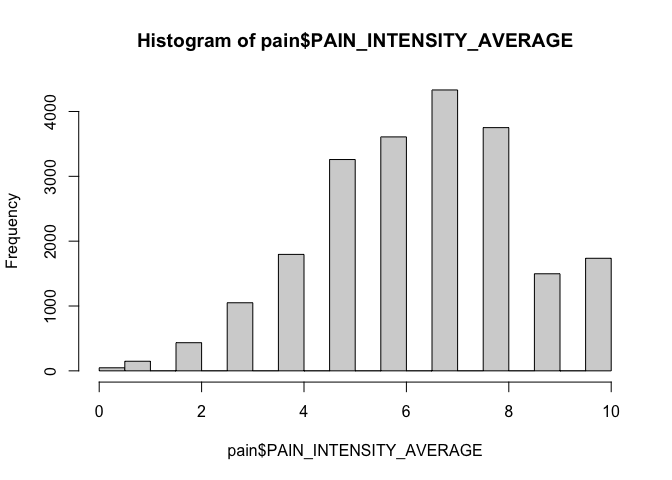

In [ ]:
hist(pain$PAIN_INTENSITY_AVERAGE)

### Practice Question

Summarize the `PROMIS_SLEEP_DISTURB_V1_0` column both numerically and
visually. Your results should look like the results in
<a href="#fig-sleep-disturb-hist" class="quarto-xref">Figure 1</a>.

<figure id="fig-sleep-disturb-hist">
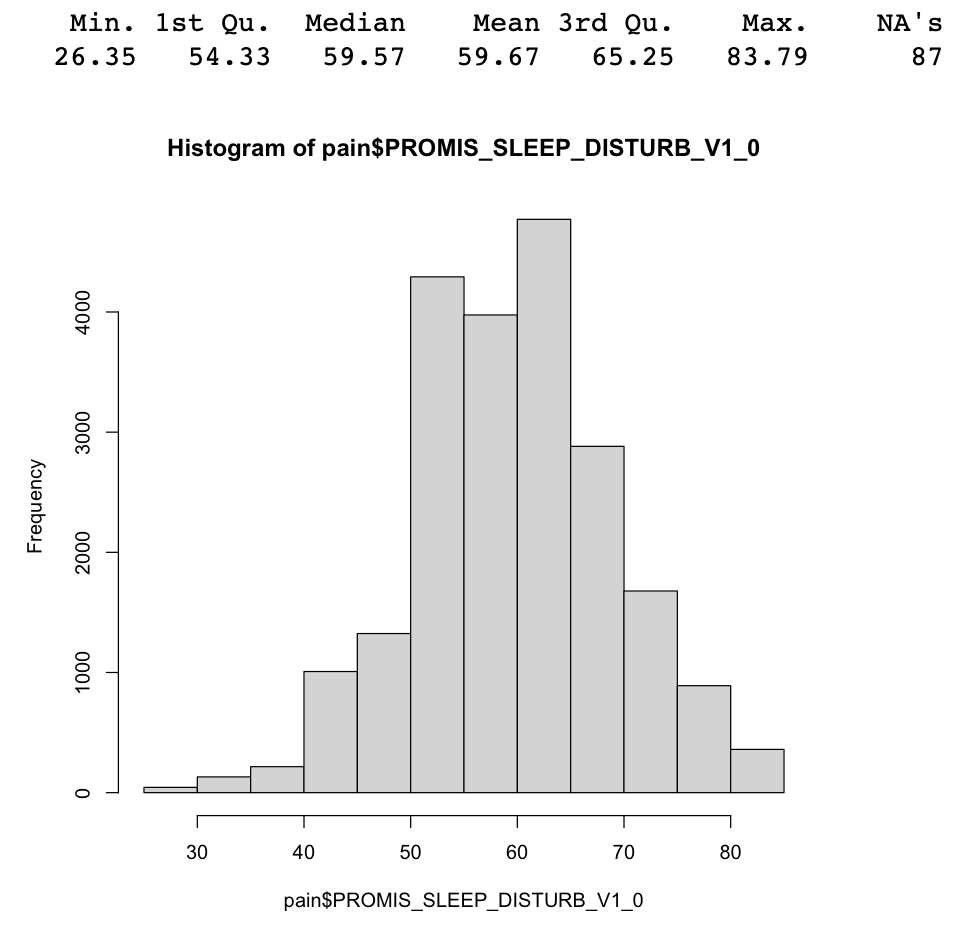
<figcaption>Figure 1: Summarizing a Column.</figcaption>
</figure>

In [ ]:
# Insert your solution here:

We can also use the `summary()` function for categorical variables. In
this case, R finds the counts for each level.

In [ ]:
summary(pain$PAT_SEX)

   Length     Class      Mode 
    21659 character character 

For categorical columns, it is also useful to use the `table()`
function, which returns the counts for each possible value, instead of
the `summary()` function. By default, `table()` ignores NA values.
However, we can set `useNA="always"` if we also want to display the
number of NA values in the table output. Additionally, we can use the
`prop.table()` function to convert the counts to proportions. Using
these functions, we can see that the column `PAT_SEX` column, which
corresponds to the reported patient sex, has a single missing value, and
we can also see that around 60% of patients are female.

In [ ]:
table(pain$PAT_SEX, useNA="always")


female   male   <NA> 
 13102   8556      1 

In [ ]:
prop.table(table(pain$PAT_SEX))


   female      male 
0.6049497 0.3950503 

Note that this column is not actually a factor column yet, which we can
check using the `is.factor()` function. We can convert it to one using
`as.factor()`.

In [ ]:
is.factor(pain$PAT_SEX)

[1] FALSE

In [ ]:
pain$PAT_SEX <- as.factor(pain$PAT_SEX)
is.factor(pain$PAT_SEX)

[1] TRUE

### Other Summary Functions

Sometimes we want to summarize information across multiple columns or
rows. We can use the `rowSums()` and `colSums()` functions to sum over
the rows or columns of a matrix or data frame. We first subset the data
to the body pain map regions. In the first line of code, I select the
column names pertaining to these columns. This allows me to select those
columns in the second line of code and store this subset of the data as
a new data frame called `pain_body_map`.

In [ ]:
body_map_cols <- names(pain)[2:75]
pain_body_map <- pain[, body_map_cols]
head(pain_body_map)

# A tibble: 6 × 74
   X101  X102  X103  X104  X105  X106  X107  X108  X109  X110  X111  X112  X113
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1     0     0     0     0     0     0     0     0     0     0     0     0     0
2     0     0     0     0     0     0     0     0     0     0     0     0     0
3     0     0     0     0     0     0     0     0     0     0     0     0     0
4     0     0     0     0     0     0     0     0     0     0     0     0     0
5     0     0     0     0     0     0     0     0     0     0     0     0     0
6     0     0     0     0     0     0     0     0     0     1     0     1     0
# ℹ 61 more variables: X114 <dbl>, X115 <dbl>, X116 <dbl>, X117 <dbl>,
#   X118 <dbl>, X119 <dbl>, X120 <dbl>, X121 <dbl>, X122 <dbl>, X123 <dbl>,
#   X124 <dbl>, X125 <dbl>, X126 <dbl>, X127 <dbl>, X128 <dbl>, X129 <dbl>,
#   X130 <dbl>, X131 <dbl>, X132 <dbl>, X133 <dbl>, X134 <dbl>, X135 <dbl>,
#   X136 <dbl>, X201 <dbl>, X202 <dbl>, X2

I now compute the row sums and column sums on this subset of data. The
row sum for each patient is the total number of body parts in which they
experience pain, whereas the column sum for each pain region is the
total number of patients who experience pain in that area. The following
histogram shows that most people select a low number of total regions.

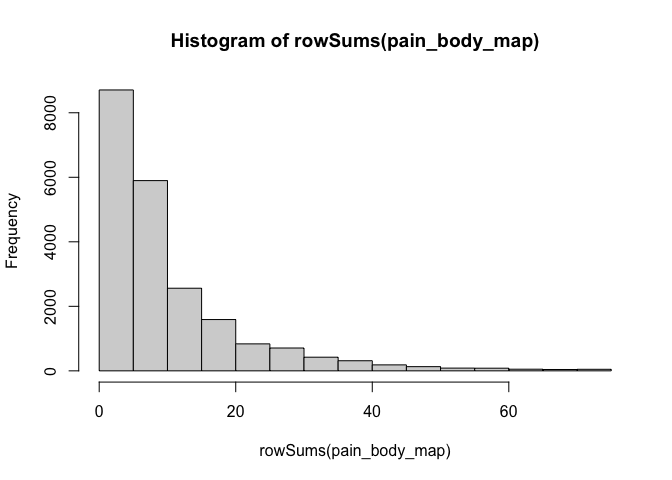

In [ ]:
hist(rowSums(pain_body_map))

We can also see that some body parts are more often selected than
others. We create a vector called `perc_patients` by finding the number
of patients who selected each region divided by the total number of
patients. The histogram shows that some body regions are selected by
over 50% of patients!

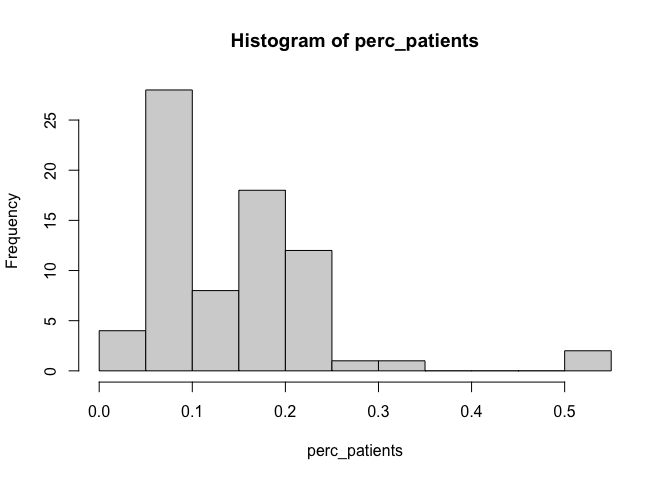

In [ ]:
perc_patients <- colSums(pain_body_map, na.rm=TRUE) /
  nrow(pain_body_map)
hist(perc_patients)

We use the `which.max()` function to see that the 55th region `X219` is
selected the most number of times. This corresponds to lower back pain.

In [ ]:
which.max(perc_patients)

X219 
  55 

Another pair of useful functions are `pmin()` and `pmax()`. These
functions take at least two vectors and find the pairwise minimum or
maximum across those vectors, as shown in the subsequent code.

In [ ]:
v1 = c(5, 9, 12)
v2 = c(2, 18, 4)
pmax(v1, v2)  

[1]  5 18 12

Looking back at the `pain` data, if we want to create a new column
`lower_back_pain` that corresponds to whether someone selects *either*
X218 or X219 we can use the `pmax()` function to find the maximum value
between columns `X218` and `X219`. We can see that almost 60% of
patients select at least one of these regions.

In [ ]:
lower_back <- pmax(pain_body_map$X218, pain_body_map$X219)
prop.table(table(lower_back))

lower_back
        0         1 
0.4053929 0.5946071 

We might want to store the total number of pain regions and our
indicator of whether or not a patient has lower back pain as new
columns. We create new columns in the pain data using the `$` operator
in the previous code chunk. To be consistent with the column naming in
the data, we use all uppercase for our column names. The `dim()`
function shows that our data has grown by two columns, as expected.

In [ ]:
pain$NUM_REGIONS <- rowSums(pain_body_map)
pain$LOWER_BACK <- lower_back
dim(pain)

[1] 21659    94

Another useful function that allows us to perform computations over the
rows or columns of a matrix or data frame is the `apply(X, MARGIN, FUN)`
function, which takes in three arguments. The first argument is a data
frame or matrix `X`, the second argument `MARGIN` indicates whether to
compute over the rows (`1`) or columns (`2`), and the last argument is
the function `FUN` to apply across that margin. The subsequent code
finds the maximum value for each row in the data frame `pain_body_map`.
Taking the minimum value of the row maximum values shows that every
patient selected at least one body map region.

In [ ]:
any_selected <- apply(pain_body_map, 1, max)
min(any_selected, na.rm=TRUE)

[1] 1

In a second example, we find the sum of the body pain regions over the
columns, which is equivalent to the previous example using `colSums()`.
In this case, we added the `na.rm=TRUE` argument. The `apply()` function
passes any additional arguments to the function `FUN`.

In [ ]:
perc_patients <- apply(pain_body_map, 2, sum, na.rm=TRUE) /
  nrow(pain_body_map)
summary(perc_patients)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03227 0.06966 0.13620 0.14375 0.18125 0.54190 

### Practice Question

Find the sum of each of the PROMIS measures across all patients using
`apply()` and then using `colSums()`. Verify that these two methods
return the same result, which is given in
<a href="#fig-promis-col-sums" class="quarto-xref">Figure 2</a>.

<figure id="fig-promis-col-sums">
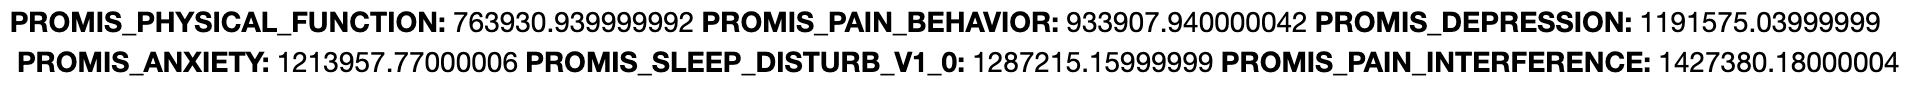
<figcaption>Figure 2: Summing Across Columns.</figcaption>
</figure>

In [ ]:
# Insert your solution here:

### Missing, Infinite, and NaN Values    

As we have seen, this data contains some missing values, which are
represented as `NA` in R. R treats these values as if they were unknown,
which is why we have to add the `na.rm=TRUE` argument to functions like
`sum()` and `max()`. In the following example, we can see that R figures
out that 1 plus an unknown number is also unknown!

In [ ]:
NA+1

[1] NA

We can determine whether a value is missing using the function
`is.na()`. This function returns `TRUE` if the value is NA, and `FALSE`
otherwise. We can then sum up these values for a single column since
each `TRUE` value corresponds to a value of 1, and each `FALSE`
corresponds to a value of 0. We observe that there is a single NA value
for the column `PATIENT_NUM`, which is the patient ID number.

In [ ]:
sum(is.na(pain$PATIENT_NUM))

[1] 1

If we want to calculate the sum of NA values for each column instead of
just a single column, we can use the `apply()` function. Since we want
to apply this computation over the columns, the second argument has
value 2. Recall that the last argument is the function we want to call
for each column. In this case, we want to apply the combination of the
`sum()` and `is.na()` function. To do so, we have to specify this
function ourselves. This is called an **anonymous function** , since it
doesn’t have a name.

In [ ]:
num_missing_col <- apply(pain, 2, function(x) sum(is.na(x)))
min(num_missing_col)

[1] 1

Interestingly, we can see that there is at least one missing value in
each column. It might be the case that there is a row with all NA
values. Let’s apply the same function by row. Taking the maximum, we can
see that row 11749 has all NA values.

In [ ]:
num_missing_row <- apply(pain, 1, function(x) sum(is.na(x)))
max(num_missing_row)

[1] 94

[1] 11749

We remove that row and then find the percentage of missing values by
column. We can see that the column with the highest percentage of
missing values is the pain intensity at follow-up. In fact, only 33% of
patients have a recorded follow-up visit.

In [ ]:
pain <- pain[-11749, ]
num_missing_col <- apply(pain, 2, 
                         function(x) sum(is.na(x))/nrow(pain))
num_missing_col

                     PATIENT_NUM                             X101 
                     0.000000000                      0.000000000 
                            X102                             X103 
                     0.000000000                      0.000000000 
                            X104                             X105 
                     0.000000000                      0.000000000 
                            X106                             X107 
                     0.000000000                      0.000000000 
                            X108                             X109 
                     0.000000000                      0.000000000 
                            X110                             X111 
                     0.000000000                      0.000000000 
                            X112                             X113 
                     0.000000000                      0.000000000 
                            X114                             X

We create two new columns: first, we create a column for the change in
pain at follow-up, and second, we create a column for the percent change
in pain at follow-up.

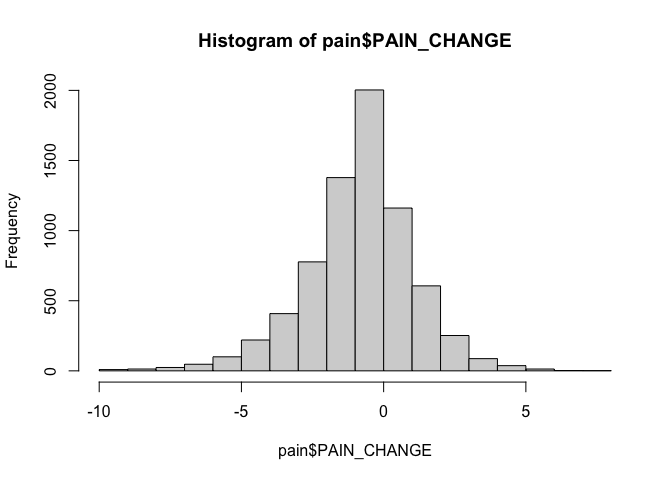

In [ ]:
pain$PAIN_CHANGE <- pain$PAIN_INTENSITY_AVERAGE.FOLLOW_UP - 
  pain$PAIN_INTENSITY_AVERAGE
hist(pain$PAIN_CHANGE)

In [ ]:
pain$PERC_PAIN_CHANGE <- pain$PAIN_CHANGE / 
  pain$PAIN_INTENSITY_AVERAGE
summary(pain$PERC_PAIN_CHANGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -1.000  -0.200   0.000     Inf   0.143     Inf   14520 

In the summary of the percent change, we can see that the maximum value
is `Inf`. This is R’s representation of infinity. This occurred because
some patients have an initial pain score of 0, which creates infinite
values when we divide through by this value to find the percent change.
We can test whether something is infinite using the `is.infinite()` or
`is.finite()` functions. This shows that there were three patients with
infinite values. The value `-Inf` is used to represent negative
infinity.

In [ ]:
sum(is.infinite(pain$PERC_PAIN_CHANGE))

[1] 3

Another special value in R is `NaN`, which stands for “Not a Number”.
For example, `0/0` results in a NaN value. We can test for `NaN` values
using the `is.nan()` function.

In [ ]:
0/0

[1] NaN

Looking back at the missing values, there are two useful functions for
selecting the complete cases in a data frame. The `na.omit()` function
returns the data frame with incomplete cases removed, whereas
`complete.cases()` returns TRUE/FALSE values for each row indicating
whether each row is complete, which we can then use to select the rows
with TRUE values. In the following code, we see that both approaches
select the same number of rows.

In [ ]:
pain_sub1 <- na.omit(pain)
pain_sub2 <- pain[complete.cases(pain), ]
dim(pain_sub1)

[1] 2413   96

[1] 2413   96

### Dates in R 

The columns in the `pain` data contain character and numeric values. One
special type of character column that is not present is a column that
corresponds to a date or date-time. By default, `read.csv()` reads these
columns in as character columns, whereas the `read_csv()` function from
the **readr** package in the **tidyverse** family recognizes common date
formats. If we have a character column, we can convert to a date object
using `as.Date()` for date columns and `as.POSIXct()` for date-time
columns. For columns with only a time but no date, you can add a date or
use the **hms** package \[@R-hms\], which is not demonstrated here.
These functions automatically try to detect the format of the inputted
string, but it is often helpful to provide the `format` and time zone
`tz`. To input our format we use the following key.

| Symbol | Description                    |
|--------|--------------------------------|
| %Y     | Four-digit year.               |
| %y     | Two-digit year.                |
| %m     | Numeric month.                 |
| %b%    | Abbreviated name of month.     |
| %B     | Full name of month.            |
| %d     | Numeric day of the month.      |
| %H     | Military time hour (24 hours). |
| %I     | Imperial time hour (12 hours). |
| %M     | Minute.                        |
| %S     | Seconds.                       |
| %p     | AM/PM                          |

In [ ]:
date_example <- data.frame(x = c("2020-01-15", "2021-11-16", 
                                 "2019-08-01"),
                           y = c("2020-01-15 3:14 PM", 
                                 "2021-11-16 5:00 AM",
                                 "2019-08-01 3:00 PM"),
                           z = c("04:10:00", "11:35:11", "18:00:45"))

# Convert date and date times using formats
date_example$x <- as.Date(date_example$x, format = "%Y-%m-%d", 
                          tz = "EST")
date_example$y <- as.POSIXct(date_example$y, 
                             format = "%Y-%m-%d %I:%M %p")

# Add date to z and convert
date_example$z <- paste("2024-06-24", date_example$z)
date_example$z <- as.POSIXct(date_example$z, 
                             format = "%Y-%m-%d %H:%M:%S")
date_example

           x                   y                   z
1 2020-01-15 2020-01-15 15:14:00 2024-06-24 04:10:00
2 2021-11-16 2021-11-16 05:00:00 2024-06-24 11:35:11
3 2019-08-01 2019-08-01 15:00:00 2024-06-24 18:00:45

By recognizing these columns as dates, we can find the time between two
dates using the `difftime()` function. This function takes in two times
`time1` and `time2` and finds the difference `time1 - time2` in the
given `units`.

In [ ]:
difftime(date_example$x[2], date_example$x[1], units = "days")

Time difference of 671 days

Additionally, we can use the `seq()` function to add or subtract time by
specifying a unit for `by`.

In [ ]:
seq(date_example$x[1], by = "month", length = 3)

[1] "2020-01-15" "2020-02-15" "2020-03-15"

For those interested in doing more manipulations with dates, the
**lubridate** package \[@R-lubridate\] in the **tidyverse** expands upon
the base functionality of R for working with dates. This package uses
its own date-time class and includes functions to easily extract
information from and manipulate dates.

## Using Logic to Subset, Summarize, and Transform 

We have already seen how to use TRUE/FALSE values to select rows in a
data frame. The following logic operators in R allow us to expand on
this capability to write more complex logic.

-   `<` less than
-   `<=` less than or equal to
-   `>` greater than
-   `>=` greater than or equal to
-   `==` equal to
-   `!=` not equal to
-   `a %in% b` a’s value is in a vector of values b

The first six operators are a direct comparison between two values.

In [ ]:
2 < 2

[1] FALSE

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

The operators assume there is a natural ordering or comparison between
values. For example, for strings the ordering is alphabetical and for
logical operators we use their numeric interpretation (TRUE = 1, FALSE =
0).

In [ ]:
"A" < "B"

[1] TRUE

[1] FALSE

The `%in%` operator is slightly different. This operator checks whether
a value is in a set of possible values. For example, we can check
whether values are in the set `c(4,1,2)`.

In [ ]:
1 %in% c(4, 1, 2)

[1] TRUE

[1] FALSE  TRUE FALSE

Additionally, we can use the following operators, which allow us to
negate or combine logical operators.

-   `!x` - the **NOT** operator `!` reverses TRUE/FALSE values
-   `x | y` - the **OR** operator `|` checks whether *either* x or y is
    equal to TRUE
-   `x & y` - the **AND** operator `&` checks whether *both* x and y are
    equal to TRUE
-   `xor(x,y)` - the **xor** function checks whether exactly one of x or
    y is equal to TRUE (called exclusive or)
-   `any(x)` - the **any** function checks whether any value in x is
    TRUE (equivalent to using an OR operator `|` between all values)
-   `all(x)` - the **all** function checks whether all values in x are
    TRUE (equivalent to using an AND operator `&` between all values)

Some simple examples for each are given in the following code chunk.

In [ ]:
!(2 < 3)

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] TRUE

[1] FALSE

Let’s demonstrate these operators on the pain data. We first update the
Medicaid column by making the character values more informative. The
logic on the left-hand side selects those who do or do not have Medicaid
and then assigns those values to the new ones.

In [ ]:
pain$MEDICAID_BIN[pain$MEDICAID_BIN == "no"] <- "No Medicaid"
pain$MEDICAID_BIN[pain$MEDICAID_BIN == "yes"] <- "Medicaid"
table(pain$MEDICAID_BIN)


   Medicaid No Medicaid 
       4601       16757 

Additionally, we could subset the data to only those who have a
follow-up. The not operator `!` reverses the TRUE/FALSE values returned
from the `is.na()` function. Therefore, the new value is TRUE if the
follow-up value is *not* NA.

In [ ]:
pain_follow_up <- pain[!is.na(pain$PAIN_INTENSITY_AVERAGE.FOLLOW_UP), ]

Earlier, we created a column indicating whether or not a patient has
lower back pain. We now use the `any()` function to check whether a
patient has general back pain. If at least one of these values is equal
to 1, then the function returns TRUE. If we had used the `all()`
function instead, this would check whether all values are equal to 1,
indicating that a patient has pain in their whole back.

In [ ]:
pain$BACK <- any(pain$X208==1, pain$X209==1, pain$X212==1, 
                 pain$X213==1, pain$X218==1, pain$X219==1)

### Practice Question

Subset the `pain` data to those who have a follow-up and have an initial
average pain intensity of 5 or above. Name this subset of the data
`pain_subset`. Print the head of this data. The first six patient IDs in
this new dataset should be 13118, 21384, 1827, 11309, 11093, and 14667.

In [ ]:
# Insert your solution here:

Lastly, we look at the column for patient race `PAT_RACE`. The `table()`
function shows that most patients are `WHITE` or `BLACK`. Given how few
observations are in the other categories, we may want to combine some of
these levels into one.

In [ ]:
table(pain$PAT_RACE)


         ALASKA NATIVE        AMERICAN INDIAN                  BLACK 
                     2                     58                   3229 
               CHINESE               DECLINED               FILIPINO 
                    21                    121                      6 
         GUAM/CHAMORRO               HAWAIIAN         INDIAN (ASIAN) 
                     1                      1                     49 
              JAPANESE                 KOREAN          NOT SPECIFIED 
                     9                     10                      4 
                 OTHER            OTHER ASIAN OTHER PACIFIC ISLANDER 
                     1                     47                     12 
            VIETNAMESE                  WHITE 
                     6                  17940 

Another way we could have found all possible values for this column is
to use the `unique()` function. This function takes in a data frame or
vector `x` and returns `x` with all duplicate rows or values removed.

In [ ]:
unique(pain$PAT_RACE)

 [1] "WHITE"                  "BLACK"                  "DECLINED"              
 [4] "AMERICAN INDIAN"        "INDIAN (ASIAN)"         "ALASKA NATIVE"         
 [7] NA                       "FILIPINO"               "JAPANESE"              
[10] "VIETNAMESE"             "KOREAN"                 "CHINESE"               
[13] "OTHER ASIAN"            "NOT SPECIFIED"          "HAWAIIAN"              
[16] "OTHER PACIFIC ISLANDER" "OTHER"                  "GUAM/CHAMORRO"         

To combine some of these levels, we can use the `%in%` operator. We
first create an Asian, Asian American, or Pacific Islander race category
and then create an American Indian or Alaska Native category.

In [ ]:
aapi_values <- c("CHINESE", "HAWAIIAN", "INDIAN (ASIAN)", "FILIPINO", 
                 "VIETNAMESE", "JAPANESE", "KOREAN", "GUAM/CHAMORRO", 
                 "OTHER ASIAN", "OTHER PACIFIC ISLANDER")
pain$PAT_RACE[pain$PAT_RACE %in% aapi_values] <- "AAPI"
pain$PAT_RACE[pain$PAT_RACE %in% 
                c("ALASKA NATIVE", "AMERICAN INDIAN")] <- "AI/AN"
table(pain$PAT_RACE)


         AAPI         AI/AN         BLACK      DECLINED NOT SPECIFIED 
          162            60          3229           121             4 
        OTHER         WHITE 
            1         17940 

### Other Selection Functions 

In the previous code, we selected rows using TRUE/FALSE Boolean values.
Instead, we could have also used the `which()` function. This function
takes TRUE/FALSE values and returns the index values for all the TRUE
values. We use this to treat those with race given as `DECLINED` as not
specified.

In [ ]:
pain$PAT_RACE[which(pain$PAT_RACE == "DECLINED")] <- "NOT SPECIFIED"

Another selection function is the `subset()` function. This function
takes in two arguments. The first is the vector, matrix, or data frame
to select from, and the second is a vector of TRUE/FALSE values to use
for row selection. We use this to find the observation with race marked
as `OTHER`. We then update this race to also be marked as not specified.

In [ ]:
subset(pain, pain$PAT_RACE == "OTHER")

# A tibble: 1 × 97
  PATIENT_NUM  X101  X102  X103  X104  X105  X106  X107  X108  X109  X110  X111
        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1        3588     1     1     1     0     1     1     1     0     0     0     0
# ℹ 85 more variables: X112 <dbl>, X113 <dbl>, X114 <dbl>, X115 <dbl>,
#   X116 <dbl>, X117 <dbl>, X118 <dbl>, X119 <dbl>, X120 <dbl>, X121 <dbl>,
#   X122 <dbl>, X123 <dbl>, X124 <dbl>, X125 <dbl>, X126 <dbl>, X127 <dbl>,
#   X128 <dbl>, X129 <dbl>, X130 <dbl>, X131 <dbl>, X132 <dbl>, X133 <dbl>,
#   X134 <dbl>, X135 <dbl>, X136 <dbl>, X201 <dbl>, X202 <dbl>, X203 <dbl>,
#   X204 <dbl>, X205 <dbl>, X206 <dbl>, X207 <dbl>, X208 <dbl>, X209 <dbl>,
#   X210 <dbl>, X211 <dbl>, X212 <dbl>, X213 <dbl>, X214 <dbl>, X215 <dbl>, …

In [ ]:
pain$PAT_RACE[pain$PATIENT_NUM==3588] <- "NOT SPECIFIED"
table(pain$PAT_RACE)


         AAPI         AI/AN         BLACK NOT SPECIFIED         WHITE 
          162            60          3229           126         17940 

## Exercises

For these exercises, we use the `pain` data from the **HDSinRdata**
package.

1.  Print summary statistics for the `PROMIS_PHYSICAL_FUNCTION` and
    `PROMIS_ANXIETY` columns in this dataset. Read the data
    documentation for these two columns, which both have range 0 to 100,
    and then comment on the distributions of these columns.

2.  Create frequency tables for the values of `PAT_SEX` and `PAT_RACE`
    and summarize what these tables tell you about the distributions of
    these demographic characteristics.

3.  Create a new data frame called `pain.new` that doesn’t contain
    patients with NA values for both `GH_MENTAL_SCORE` and
    `GH_PHYSICAL_SCORE`, which are the PROMIS global mental and physical
    scores, respectively.

4.  Create a vector of the proportion of patients who reported pain in
    each of the pain regions. Then, find the minimum, median, mean,
    maximum, standard deviation, and variance of this vector.

5.  Calculate the median and interquartile range of the distribution of
    the total number of painful **leg** regions selected for each
    patient. Then, write a few sentences explaining anything interesting
    you observe about this distribution in the context of this dataset.

6.  Look at the distribution of average pain intensity between patients
    with only one pain region selected vs. those with more than one
    region selected. What do you notice?

7.  Create a histogram to plot the distribution of the
    `PAIN_INTENSITY_AVERAGE.FOLLOW_UP` column. Then, create a table
    summarizing how many patients had missing values in this column.
    Finally, choose two columns to compare the distribution between
    those with and without missing follow-up. What do you notice?